### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("hr_employee_churn_data.csv")
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

In [9]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
## categorical Features --> [Salary]
## Binary Features-->[Work_accident,promotion_last_5years]
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

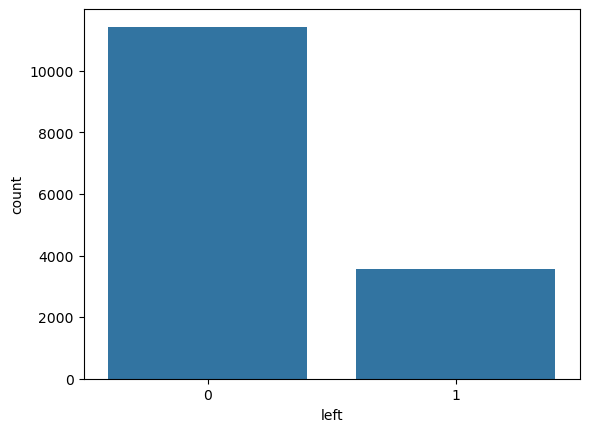

In [15]:
## Check No of employees W.R.T dependent feature 'left'
sns.countplot(x="left",data=df)
plt.show()

In [17]:
## No of people who left are very less
## Dataset is imbalanced

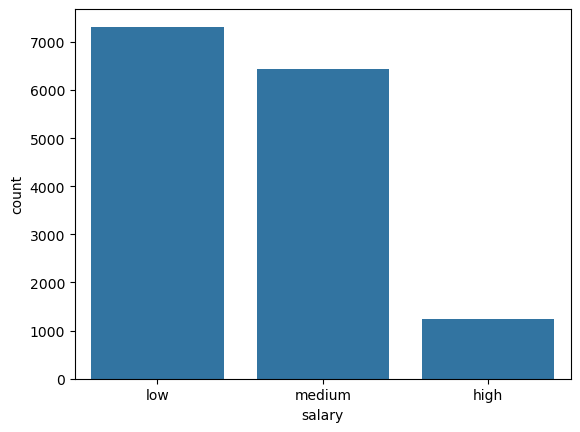

In [19]:
## Salary
sns.countplot(x='salary',data=df)
plt.show()

In [21]:
## employee count if high for low salary

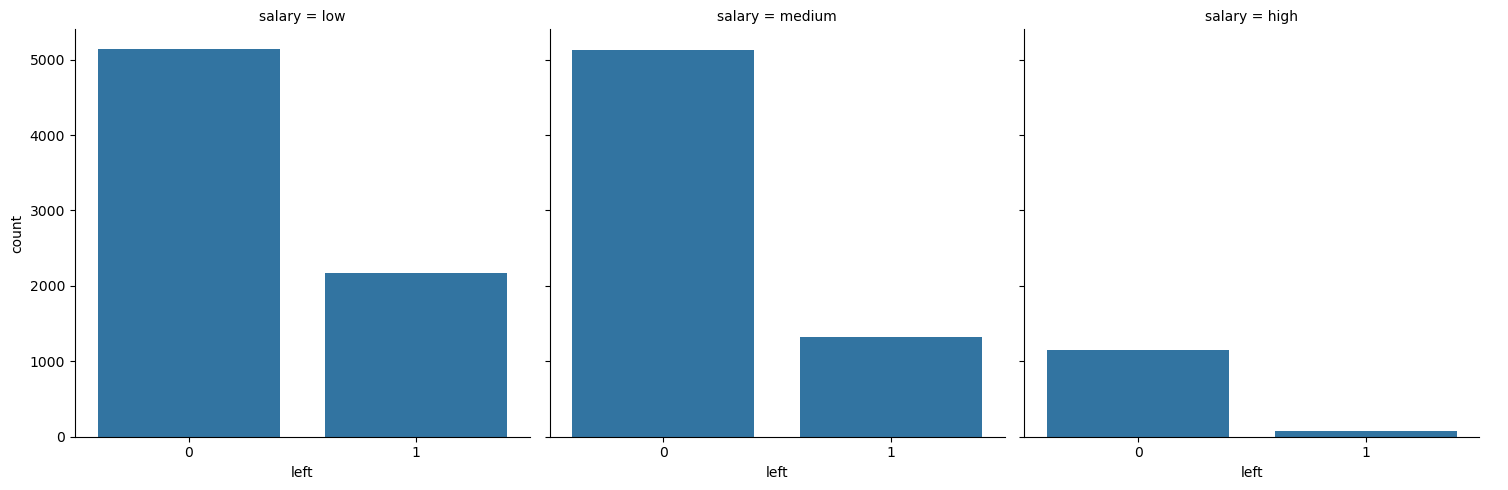

In [23]:
## 'Left' split based on Salary
sns.catplot(x='left',col='salary',kind='count',data=df)
plt.show()

In [24]:
## low salaried employees are having a high churning rate

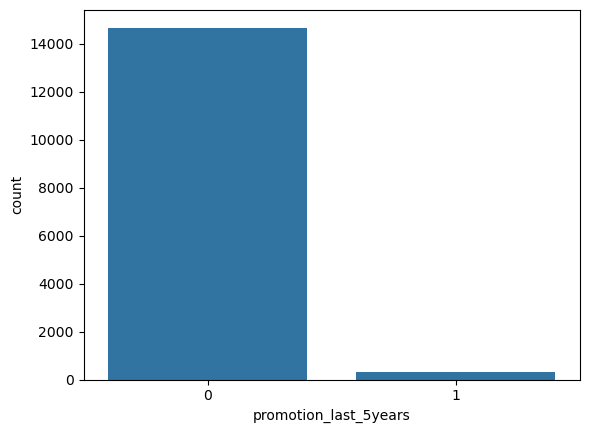

In [27]:
## Promotion last 5 years
sns.countplot(x='promotion_last_5years',data=df)
plt.show()

In [29]:
## No of employees who were not promoted for last 5 years are high in number

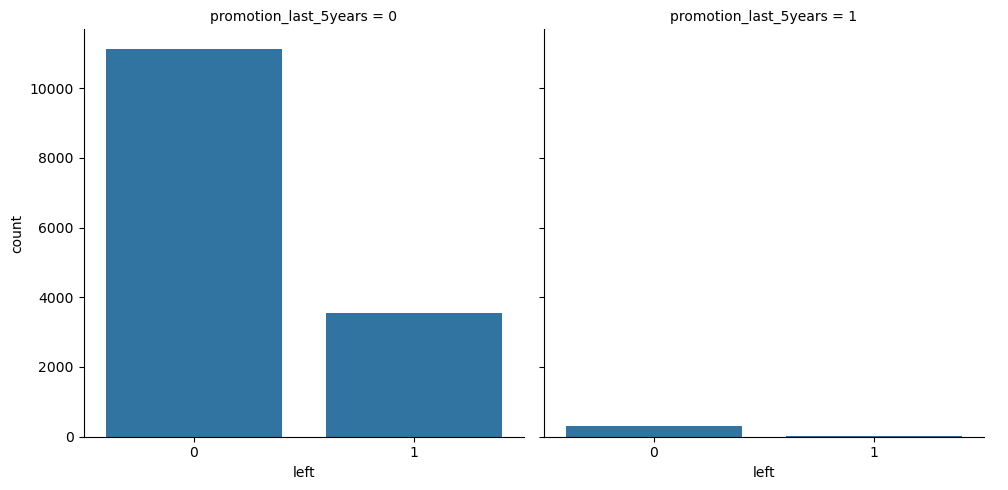

In [31]:
## Promotion w.r.t left(churn)
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=df)

In [33]:
## non promoted people left more

<Axes: xlabel='Work_accident', ylabel='count'>

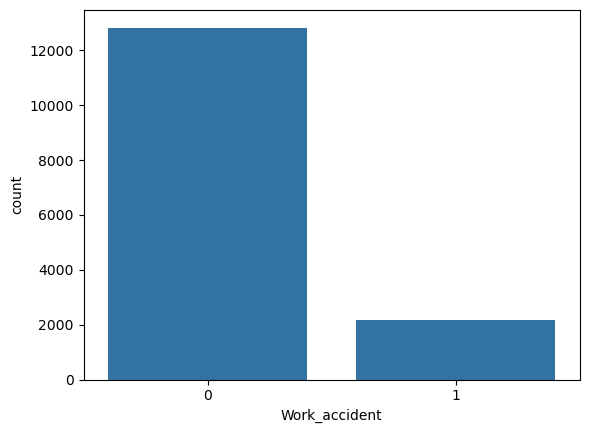

In [35]:
## work-accident
sns.countplot(x='Work_accident',data=df)

In [37]:
## less no of people made work_accident

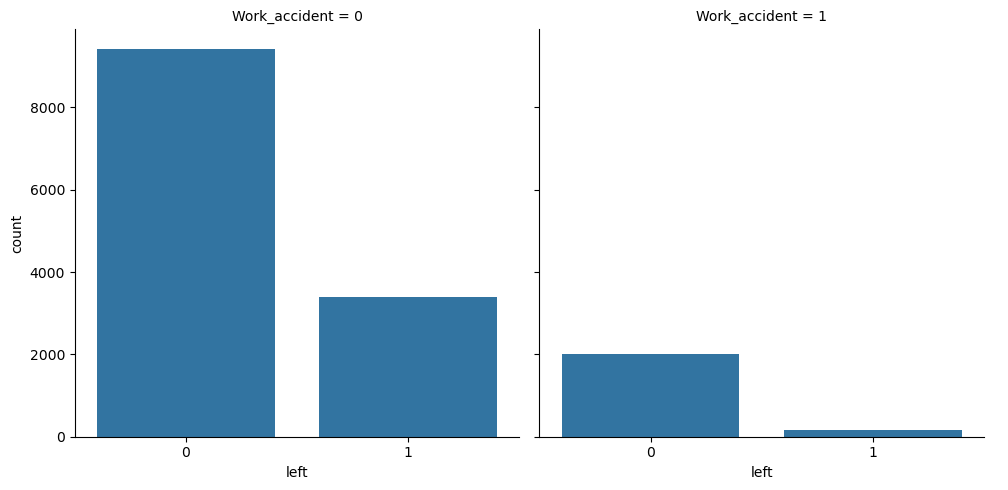

In [39]:
## work_accident vs left
sns.catplot(x='left',col='Work_accident',kind='count',data=df)

In [41]:
## people left more who did more accident [less imp]

In [43]:
df.isnull().sum()
df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)
df.isnull().sum()

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\2753099026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)


empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\2459769281.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


<Axes: xlabel='satisfaction_level', ylabel='Density'>

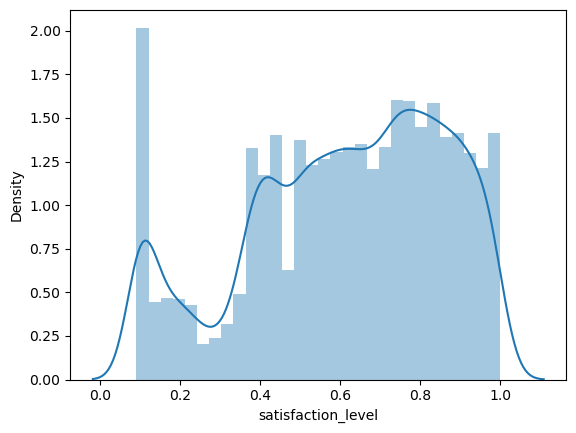

In [45]:
## Satisfaction feature : univariate distribution 
sns.distplot(df['satisfaction_level'])

In [47]:
## range (0.1 to 1) with highest satisfaction value 0.1

<Axes: xlabel='left', ylabel='satisfaction_level'>

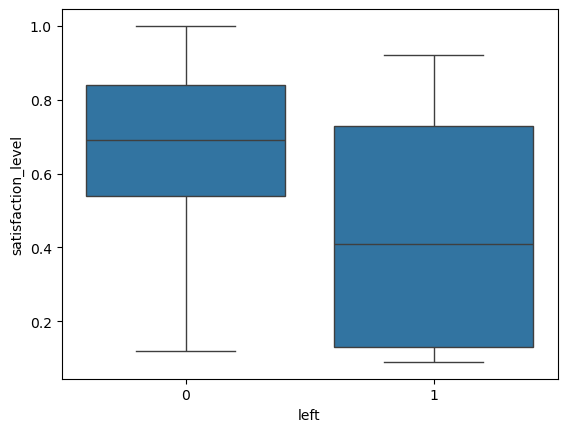

In [49]:
## left w.r.t satisfaction level of people
sns.boxplot(x='left',y='satisfaction_level',data=df)

In [51]:
## people with less satisfaction level (0.2 to 0.5 ) has high churning rate

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\3207730740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_project'])


<Axes: xlabel='number_project', ylabel='Density'>

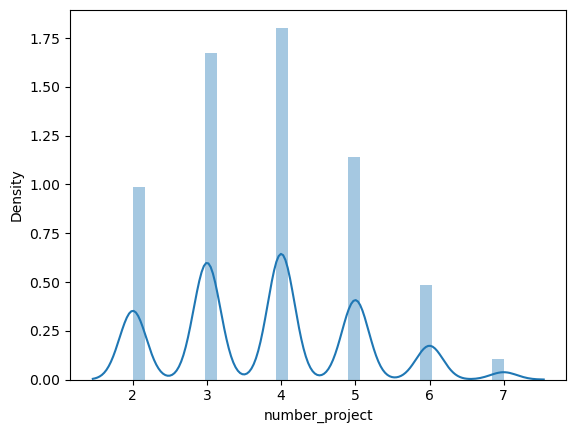

In [53]:
## no of projects : univariate dist
sns.distplot(df['number_project'])

In [55]:
## it ranges from (2 to 7) with 4 as high count

<Axes: xlabel='left', ylabel='number_project'>

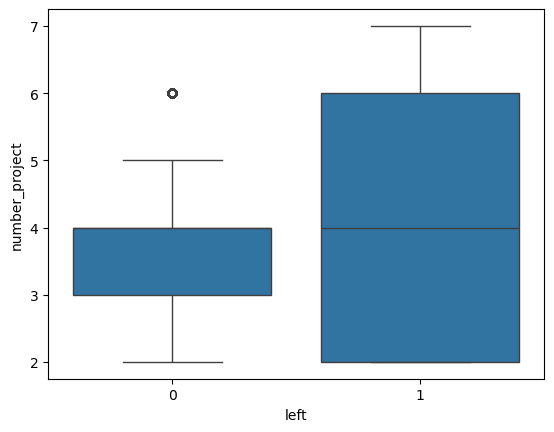

In [57]:
## box plot : left w.r.t no of projects
sns.boxplot(x='left',y='number_project',data=df)

In [59]:
## employee left when project count is high and retained when count is less

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\503613783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<Axes: xlabel='last_evaluation', ylabel='Density'>

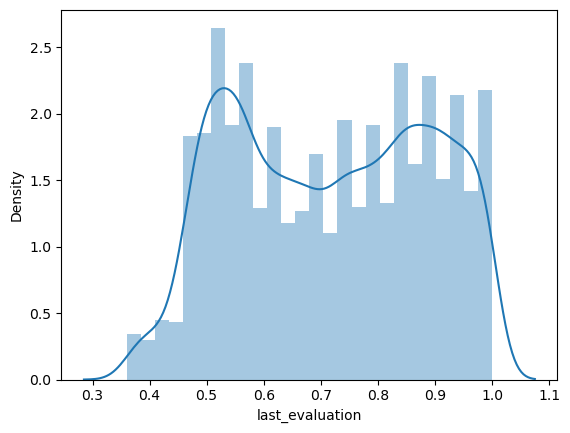

In [63]:
## last_evolution
sns.distplot(df['last_evaluation'])

In [65]:
## distributed from 0.35 to 1

<Axes: xlabel='left', ylabel='last_evaluation'>

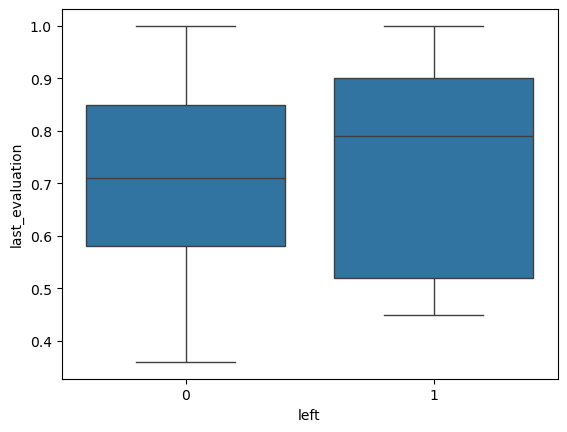

In [67]:
## box plot: left w.r.t last_evaluation
sns.boxplot(x='left',y='last_evaluation',data=df)

In [69]:
## employees left who has max evaluation value

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\3469655994.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

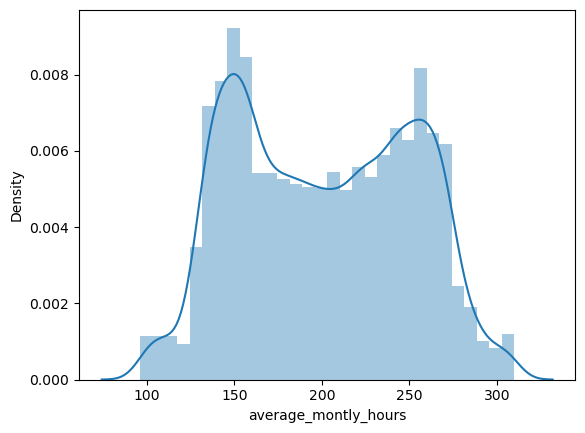

In [71]:
## average_montly_hours 
sns.distplot(df['average_montly_hours'])

In [73]:
## distributed from 100 to 300 [ with max spent hours of 150]

<Axes: xlabel='left', ylabel='average_montly_hours'>

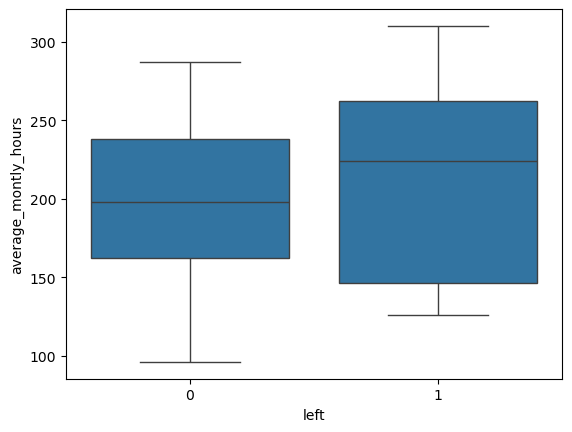

In [75]:
## boxplot: left w.r.t average_montly_hours 
sns.boxplot(x='left',y='average_montly_hours',data=df)

In [77]:
## employee left who has high average_montly_hours

C:\Users\mylaptop\AppData\Local\Temp\ipykernel_10204\1993965581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<Axes: xlabel='time_spend_company', ylabel='Density'>

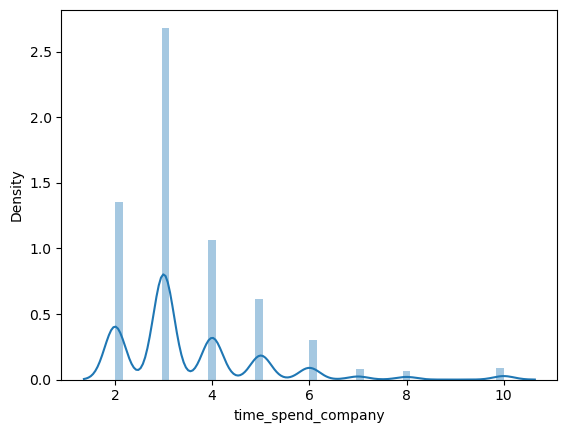

In [79]:
## time_spend_company
sns.distplot(df['time_spend_company'])

In [80]:
## distributed from 2 to 10 ,high at around 3 and low at 9

<Axes: xlabel='left', ylabel='time_spend_company'>

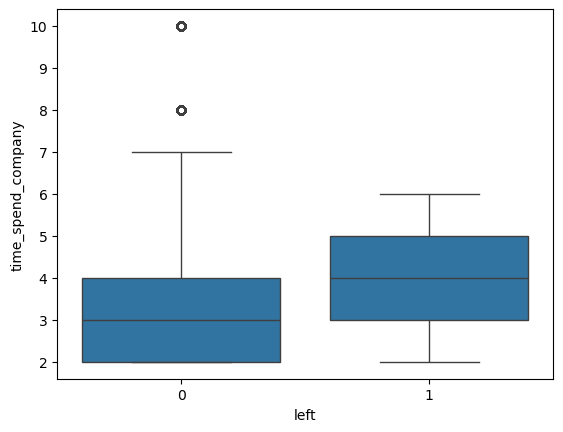

In [83]:
## box plot for left w.r.t time_spend_company
sns.boxplot(x='left',y='time_spend_company',data=df)

In [85]:
## employee left who has high time_spend_company value

In [167]:
## correlation
df.corr(numeric_only=True)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
empid,1.000000,0.045641,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994,-0.129047
satisfaction_level,0.045641,1.000000,0.104894,-0.143148,-0.020174,-0.100911,0.058652,0.025589,-0.388186
last_evaluation,-0.018168,0.104894,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.012124,-0.143148,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.009850,-0.020174,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,0.144159,-0.100911,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.015931,0.058652,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.088994,0.025589,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.129047,-0.388186,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


<Axes: >

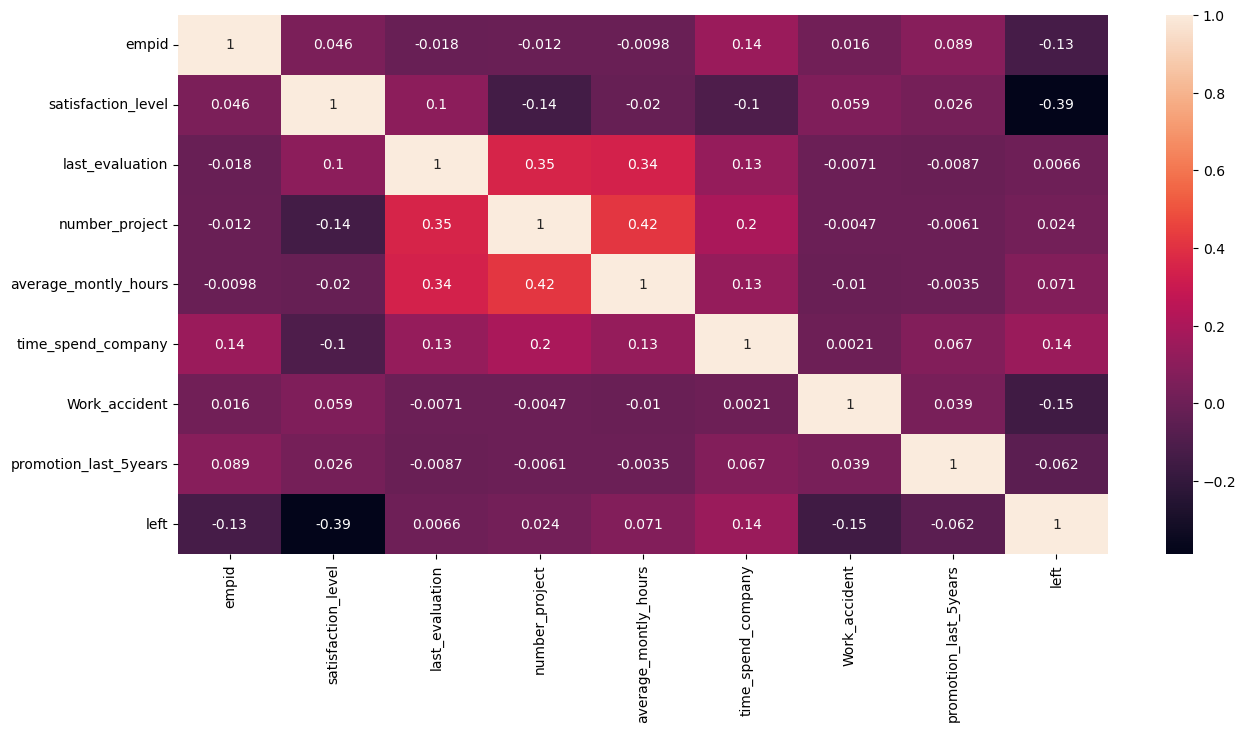

In [168]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)

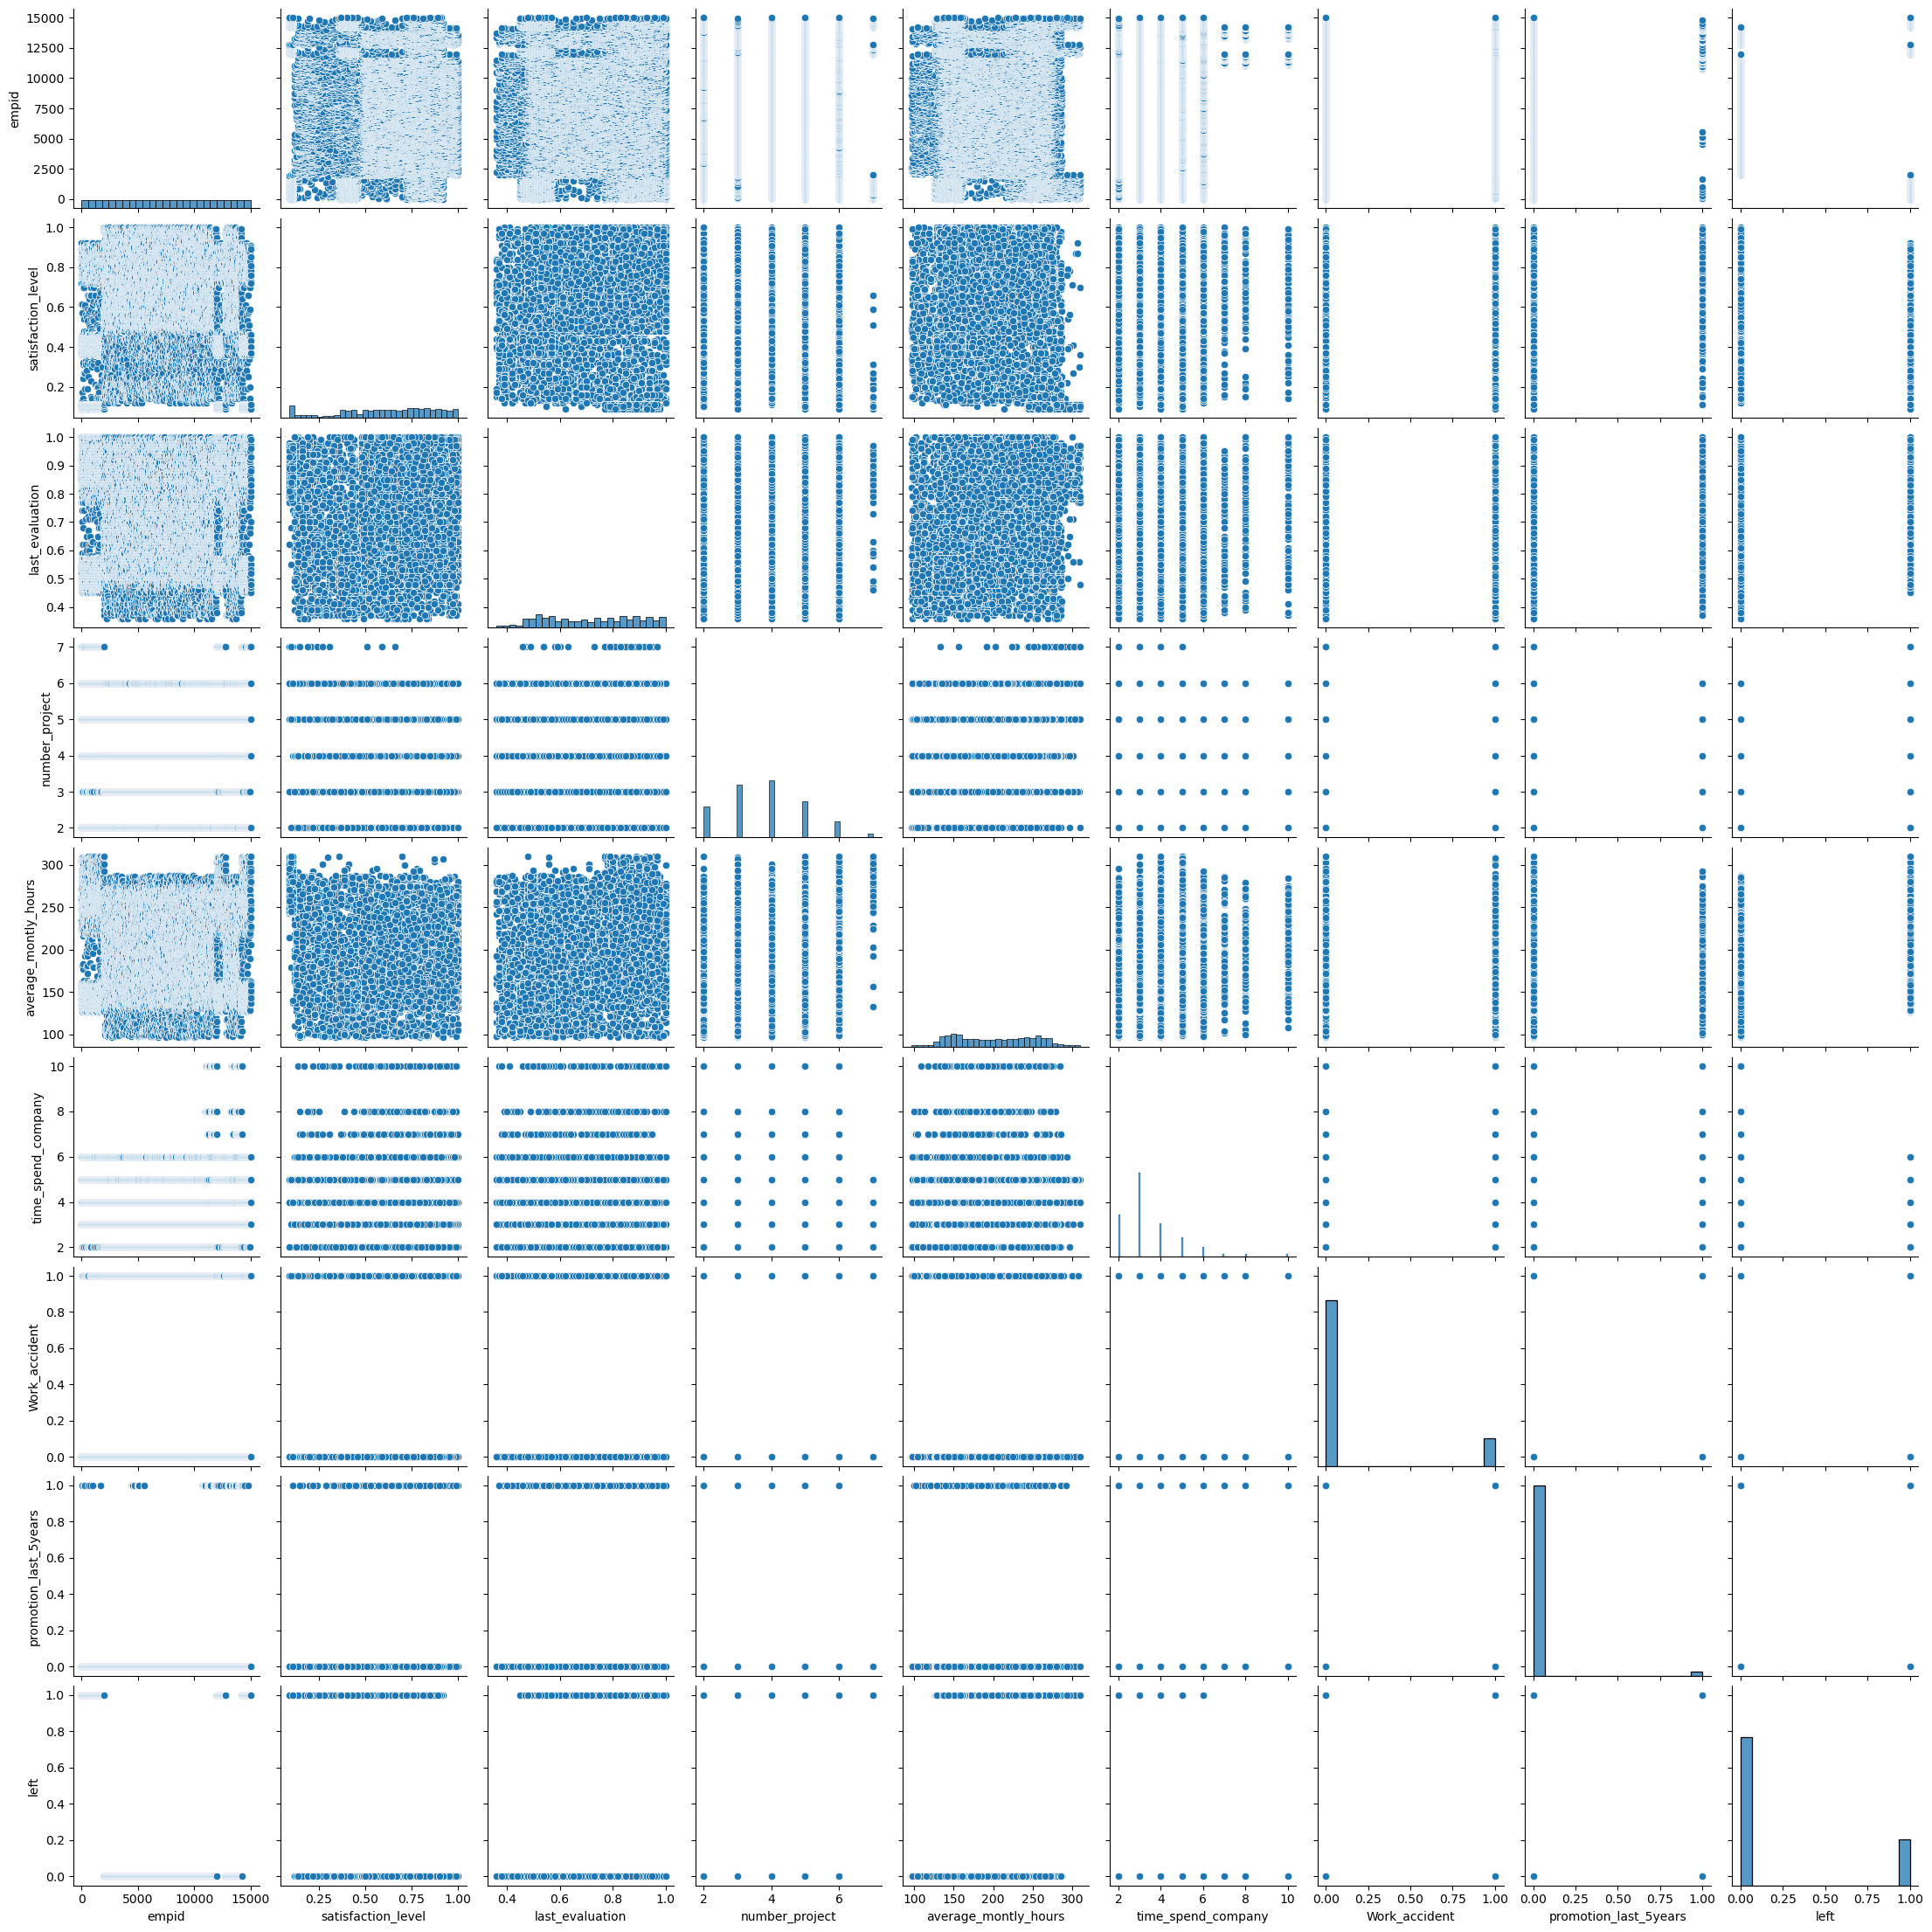

In [169]:
## Pair Plots
sns.pairplot(df)

### Feature Engineering

In [171]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [188]:
df1=df.copy()

In [190]:
## remove columns that doesn't impact output variable
df1.drop(columns=['empid'],axis=1,inplace=True)

In [192]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [194]:
df1['satisfaction_level'].describe()

count    14999.000000
mean         0.612863
std          0.248618
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [196]:
## One Hot Encoding on Categorical Variables 
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [198]:
salary_dummies=pd.get_dummies(df1['salary'],dtype='int',drop_first=True)
salary_dummies.head()
## if both low and medium are 0 then it is high

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [200]:
df1=pd.concat([df1,salary_dummies],axis=1)

In [202]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [204]:
df1.drop(columns=['salary'],axis=1,inplace=True)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


### Train Test Split

In [207]:
X=df1.drop(columns=['left'],axis=1)
y=df['left']
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


In [209]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [213]:
X_train.shape,X_test.shape

((11999, 9), (3000, 9))

### Model Selection

In [216]:
## Randomforestclassifier and XGBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [218]:
## Params
model_param={
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['gini','entropy'],
            'max_depth':range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.01],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,200]
        }
    }
}

In [220]:
import warnings
warnings.filterwarnings('ignore')
scores=[]
for model_name,mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

In [222]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9169278426142048,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995109480938,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}}]

In [224]:
## From Gridsearchcv xgboost giving best score

### Model Building

In [227]:
model_xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=100)

In [229]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [231]:
model_xgb.score(X_test,y_test)

0.9903333333333333

In [233]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,1,0


In [235]:
model_xgb.predict(X_test[:1])

array([1])

In [239]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1


In [241]:
df1.loc[1670]

satisfaction_level         0.44
last_evaluation            0.57
number_project             2.00
average_montly_hours     141.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
left                       1.00
low                        0.00
medium                     1.00
Name: 1670, dtype: float64

### Performance Metrics

In [244]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[2291,    8],
       [  21,  680]], dtype=int64)

In [246]:
from sklearn.metrics import classification_report
y_pred=model_xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.97      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



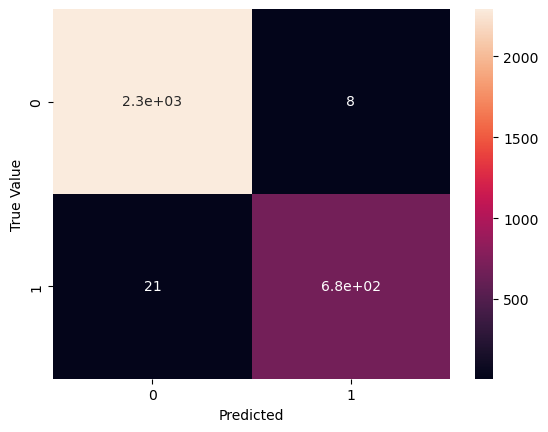

In [248]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

### Save Model

In [251]:
import pickle
pickle.dump(model_xgb,open('churn_pred.pkl','wb'))

In [253]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   low                    14999 non-null  int32  
 8   medium                 14999 non-null  int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 937.6 KB


In [257]:
X.loc[7003]

satisfaction_level         0.96
last_evaluation            0.54
number_project             3.00
average_montly_hours     198.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
low                        1.00
medium                     0.00
Name: 7003, dtype: float64